In [1]:
#base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

# Simple regression example: <br>
Data: <br>
\begin{equation}
y = x^2 + 0.2 + z 
\end{equation}
where $z \sim \mathcal{N}(0, 0.01)$ is an additive noise.

In [2]:
#generate the data
np.random.seed(123)
n = 2000
x = np.random.randn(n)
z = 0.1 * np.random.randn(n)
y = x**2 + 0.2 + z

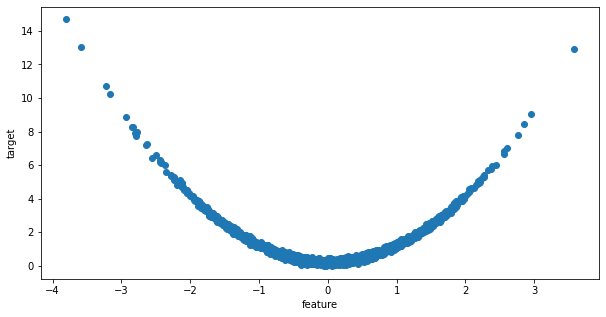

In [3]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.scatter(x, y);
ax.set_xlabel('feature')
ax.set_ylabel('target');

## preprocessing
<b>input format:</b> (batch_size, $d_0, d_1, \ldots, d_m$)

In [ ]:
x.shape

(2000,)

In [5]:
split = 1600
x_train = x[:split][..., np.newaxis]
y_train = y[:split]
x_val = x[split:][..., np.newaxis]
y_val = y[split:]

In [6]:
x_train.shape

(1600, 1)

#Keras APIs
There are two APIs for creating models:


*   Sequential
*   Functional



## Sequential API

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
#Defining the model using sequential API
model = Sequential([
                    Dense(units=32, activation='relu', input_shape=(1,), name='dense1'),
                    Dense(units=16, activation='relu', name='dense2'),
                    Dense(units=1, name='dense3')
])

Dense (fully connected) layer: <br>
for one sample:
\begin{equation}
\mathbf{y}_{1 \times u} = g(\mathbf{x}_{1 \times N} \mathbf{W}_{N \times u} +  \mathbf{b}_{1 \times u}) 
\end{equation}
where $g$ is a nonlinearity function. <br>
<br>
<br>
for a batch of size $M$:
\begin{equation}
\mathbf{y}_{M \times u} = g(\mathbf{X}_{M \times N} \mathbf{W}_{N \times u} +  \mathbf{b}_{M \times u})
\end{equation}
where 
\begin{equation}
\mathbf{X}_{M \times N} = \begin{bmatrix}
\mathbf{x}^{(1)}\\
\mathbf{x}^{(2)}\\
\vdots\\
\mathbf{x}^{(M)}
\end{bmatrix}
\end{equation}

In [8]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 32)                64        
_________________________________________________________________
dense2 (Dense)               (None, 16)                528       
_________________________________________________________________
dense3 (Dense)               (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


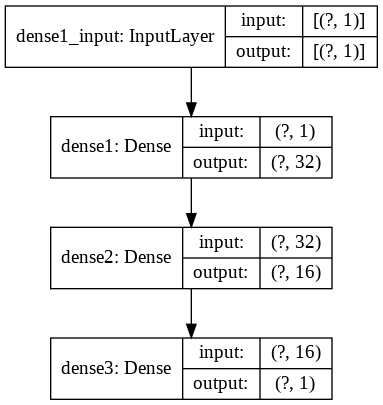

In [ ]:
#Visualizing the model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [9]:
#Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [10]:
#Training the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
50/50 [==============================] - 0s 7ms/step - loss: 3.2583 - mse: 3.2583 - mae: 1.1405 - val_loss: 3.2315 - val_mse: 3.2315 - val_mae: 0.9910
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 1.9326 - mse: 1.9326 - mae: 0.7653 - val_loss: 1.9990 - val_mse: 1.9990 - val_mae: 0.6759
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 1.0643 - mse: 1.0643 - mae: 0.5827 - val_loss: 1.2415 - val_mse: 1.2415 - val_mae: 0.5853
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6735 - mse: 0.6735 - mae: 0.5362 - val_loss: 0.9252 - val_mse: 0.9252 - val_mae: 0.5200
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4810 - mse: 0.4810 - mae: 0.4542 - val_loss: 0.7120 - val_mse: 0.7120 - val_mae: 0.4236
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3493 - mse: 0.3493 - mae: 0.3574 - val_loss: 0.5744 - val_mse: 0.5744 - val_mae: 0.3486
Epoch 7/50
50/50 [==========

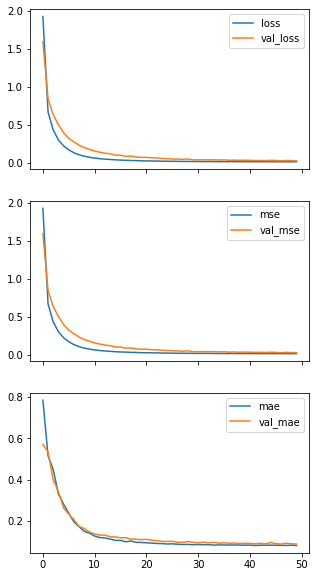

In [ ]:
df_hist = pbd.DataFrame(history.history)
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(5,10))
df_hist.plot(y=['loss', 'val_loss'], ax=ax[0])
df_hist.plot(y=['mse', 'val_mse'], ax=ax[1])
df_hist.plot(y=['mae', 'val_mae'], ax=ax[2])

In [11]:
#Evaluating the model
model.evaluate(x=x_val, y=y_val, batch_size=32)

13/13 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374 - mae: 0.0933


[0.03743762522935867, 0.03743762522935867, 0.09332846850156784]

In [12]:
#Performing predictions on the model
y_pred = model.predict(x_val)

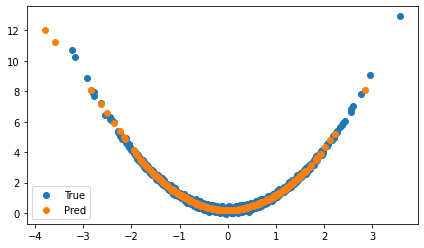

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x_train, y_train, label='True')
ax.scatter(x_val, y_pred, label='Pred')
ax.legend()

## Functional API

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [15]:
#Defining the model using functional API
X = Input(shape= (1,))
T = Dense(32, activation='relu')(X)
T = Dense(16, activation='relu')(T)
Y = Dense(1)(T)
model = Model(inputs=X, outputs=Y)

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


# Callbacks
Callbacks are utilities called at certain points during model training. <br>
examples:


*   <b>EarlyStopping</b>: Stop training when a monitored metric has stopped improving.
*   <b>ReduceLROnPlateau</b>: Reduce learning rate when a metric has stopped improving.
*   <b>ModelCheckpoint</b>: Callback to save the Keras model or model weights at some frequency. 



In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [18]:
mc = ModelCheckpoint(filepath='model', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, save_freq='epoch')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_mse', factor=0.1, patience=10, verbose=1)

In [19]:
#Defining the model and compiling it
model = Sequential([
                    Dense(32, activation='relu', input_shape=(1,), name='dense1'),
                    Dense(16, activation='relu', name='dense2'),
                    Dense(1, name='dense3')
])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [20]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[mc, es, rlrop])

Epoch 1/100
31/50 [=================>............] - ETA: 0s - loss: 1.5603 - mse: 1.5603
Epoch 00001: val_loss improved from inf to 1.27673, saving model to model
50/50 [==============================] - 0s 5ms/step - loss: 1.3665 - mse: 1.3665 - val_loss: 1.2767 - val_mse: 1.2767
Epoch 2/100
30/50 [=================>............] - ETA: 0s - loss: 0.5490 - mse: 0.5490
Epoch 00002: val_loss improved from 1.27673 to 0.80639, saving model to model
50/50 [==============================] - 0s 3ms/step - loss: 0.5627 - mse: 0.5627 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 3/100
33/50 [==================>...........] - ETA: 0s - loss: 0.4254 - mse: 0.4254
Epoch 00003: val_loss improved from 0.80639 to 0.61612, saving model to model
50/50 [==============================] - 0s 3ms/step - loss: 0.3945 - mse: 0.3945 - val_loss: 0.6161 - val_mse: 0.6161
Epoch 4/100
33/50 [==================>...........] - ETA: 0s - loss: 0.2681 - mse: 0.2681
Epoch 00004: val_loss improved from 0.61612 to 0.4885

# Customization
We can customize the tensorflow/keras components to our needs. <br>
The examples here: 


*   Layers
*   Models
*   Losses
*   Callbacks

How we do it? 


1.   importing the base class
2.   sub-classing






## Layers

In [21]:
from tensorflow.keras.layers import Layer

In [22]:
class MyDense(Layer):
  def __init__(self, units, activation=None, **kwargs):
    super(MyDense, self).__init__(**kwargs)
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    self.W = self.add_weight('W', shape=[int(input_shape[-1]), self.units], trainable=True)
    self.b = self.add_weight('bias', shape=[self.units], trainable=True)

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation == 'relu':
      return tf.nn.relu(y)
    else:
      return y

## Models

In [23]:
class MyModel(Model):
  def __init__(self, **kwargs):
    super(MyModel, self).__init__(**kwargs)

  def build(self, input_shape):
    self.mydense1 = MyDense(32, activation='relu', input_shape=input_shape)
    self.mydense2 = MyDense(16, activation='relu')
    self.mydense3 = MyDense(1)

  def call(self, inputs):
    t = self.mydense1(inputs)
    t = self.mydense2(t)
    t = self.mydense3(t)
    return t

model = MyModel()

## Loss

In [24]:
from tensorflow.keras.losses import Loss

In [25]:
class MyLoss(Loss):
  def call(self, y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype)
    return tf.reduce_mean(tf.math.square(y_pred - y_true), axis=-1)

myloss = MyLoss()

## Callbacks

In [26]:
from tensorflow.keras.callbacks import Callback

In [27]:
class MyCallback(Callback):
  def __init__(self, **kwargs):
    super(MyCallback, self).__init__( **kwargs)
  
  def on_epoch_end(self, epoch, logs=None):
    if logs['val_loss'] < 0.12:
      print('\nValidation loss is less than 0.12! Stopping training!')
      self.model.stop_training = True

mycallback = MyCallback()

## Putting together

In [28]:
model.compile(optimizer='adam', loss=myloss, metrics=['mse'])

In [29]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[mycallback])

Epoch 1/100
50/50 [==============================] - 0s 4ms/step - loss: 3.6352 - mse: 3.6352 - val_loss: 3.1359 - val_mse: 3.1359
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.7423 - mse: 1.7423 - val_loss: 1.6312 - val_mse: 1.6312
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8907 - mse: 0.8907 - val_loss: 1.1201 - val_mse: 1.1201
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.6147 - val_loss: 0.8624 - val_mse: 0.8624
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4445 - mse: 0.4445 - val_loss: 0.6771 - val_mse: 0.6771
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3247 - mse: 0.3247 - val_loss: 0.5414 - val_mse: 0.5414
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2400 - mse: 0.2400 - val_loss: 0.4499 - val_mse: 0.4499
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1842 - m


#Data pipeline

Tensorflow has its own data pipelining/processing tool which is very powerful.

##tf.data.Dataset

When iterating over training data that fits in memory, feel free to use regular Python iteration. Otherwise, tf.data.Dataset is the best way to stream training data from disk. Datasets are iterables (not iterators), and work just like other Python iterables in Eager mode. <br>
For instance, two useful methods:


1.   tf.keras.preprocessing.text_dataset_from_directory 
2.   tf.keras.preprocessing.image_dataset_from_directory



In [30]:
#creating the data from arrays
data = tf.data.Dataset.from_tensor_slices((x, y))

In [31]:
#get the elements specifications
data.element_spec

(TensorSpec(shape=(), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [32]:
#expanding the dimension 
data = data.map(lambda x, y: (x[..., tf.newaxis], y))

In [33]:
data.element_spec

(TensorSpec(shape=(1,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [34]:
#see a sample of the data
next(iter(data))

(<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-1.0856306])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.2011714518840129>)

In [35]:
#see samples of the data
for x, y in data.take(2):
  print(f'x: {x}, y: {y}')

x: [-1.0856306], y: 1.2011714518840129
x: [0.99734545], y: 1.074560209250567


In [36]:
#train and test split
train_data = data.take(1600)
val_data = data.skip(1600)

In [37]:
#batching the data
train_data = train_data.batch(32).prefetch(1)
val_data = val_data.batch(16)

In [38]:
#Defining the model and compiling it
model = Sequential([
                    Dense(32, activation='relu', input_shape=(1,), name='dense1'),
                    Dense(16, activation='relu', name='dense2'),
                    Dense(1, name='dense3')
])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [39]:
history = model.fit(x=train_data, epochs=20, validation_data=val_data)

Epoch 1/20
50/50 [==============================] - 0s 6ms/step - loss: 2.4352 - mse: 2.4352 - val_loss: 2.2145 - val_mse: 2.2145
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 1.2233 - mse: 1.2233 - val_loss: 1.1398 - val_mse: 1.1398
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6446 - mse: 0.6446 - val_loss: 0.7854 - val_mse: 0.7854
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.4140 - mse: 0.4140 - val_loss: 0.5775 - val_mse: 0.5775
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.2870 - mse: 0.2870 - val_loss: 0.4465 - val_mse: 0.4465
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.2209 - mse: 0.2209 - val_loss: 0.3738 - val_mse: 0.3738
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1868 - mse: 0.1868 - val_loss: 0.3295 - val_mse: 0.3295
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1625 - mse: 0.16

## tensorflow_datasets lib

Tensorflow also provides many popular databases.

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
#list of datasets
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

In [ ]:
#loading mnist dataset
mnist_train, mnist_val = tfds.load('mnist', split=['train', 'test'])

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
mnist_train.element_spec

{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}

Text(0.5, 1.0, '4')

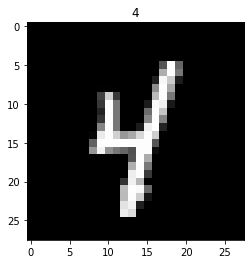

In [ ]:
sample = next(iter(mnist_train))
pic = sample['image']
label = sample['label']
plt.imshow(pic.numpy()[..., 0], cmap='gray')
plt.title(label.numpy())

In [ ]:
#preprocessing
mnist_train = mnist_train.map(lambda item: (tf.reshape(item['image'], (784,)), item['label']))\
                         .map(lambda x, y: (tf.cast(x, tf.float32)/255., tf.one_hot(y, 10)))\
                         .batch(64)\
                         .prefetch(1)
mnist_val = mnist_val.map(lambda item: (tf.reshape(item['image'], (784,)), item['label']))\
                         .map(lambda x, y: (tf.cast(x, tf.float32)/255., tf.one_hot(y, 10)))\
                         .batch(64)

In [ ]:
mnist_train.element_spec

(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [ ]:
#defining the model and compiling it
model = Sequential([
                    Dense(512, activation='relu', input_shape=(784, )),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=mnist_train, epochs=5, validation_data=mnist_val)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2045 - accuracy: 0.9393 - val_loss: 0.1076 - val_accuracy: 0.9688
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0799 - accuracy: 0.9757 - val_loss: 0.0828 - val_accuracy: 0.9740
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0788 - val_accuracy: 0.9770
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.1053 - val_accuracy: 0.9668
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0743 - val_accuracy: 0.9799


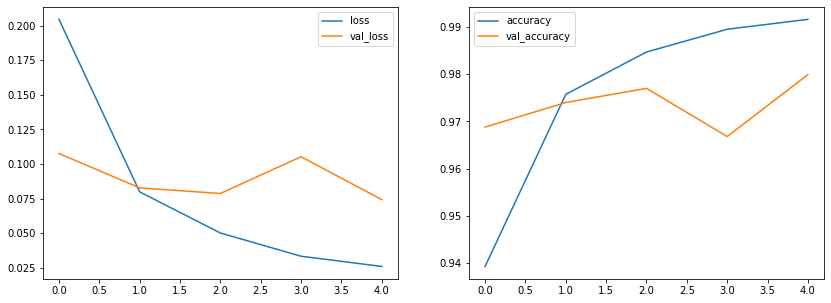

In [ ]:
df_hist = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(14,5))
df_hist.plot(y=['loss', 'val_loss'], ax=ax[0])
df_hist.plot(y=['accuracy', 'val_accuracy'], ax=ax[1])


#Transfer Learning

Transfer learning is machine learning method that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem (downstream task). <br>
We can use the whole/a part of the model, then


*   freeze it
*   fine-tune it (whole or subset of weights)
*   freeze and fine-tune it



##tf.keras.applications

tf.keras.applications provides pre-trained models.

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
#lading the inception model for computer vision and imgae analysis
inception_model = InceptionV3(include_top=False, input_shape=(150, 150, 3))

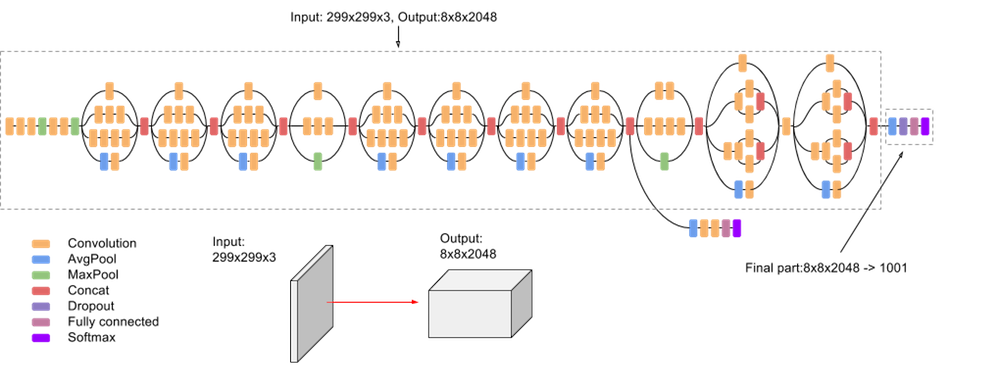

In [ ]:
#layers in inception model
print([layer.name for layer in inception_model.layers])

['input_4', 'conv2d_94', 'batch_normalization_94', 'activation_94', 'conv2d_95', 'batch_normalization_95', 'activation_95', 'conv2d_96', 'batch_normalization_96', 'activation_96', 'max_pooling2d_4', 'conv2d_97', 'batch_normalization_97', 'activation_97', 'conv2d_98', 'batch_normalization_98', 'activation_98', 'max_pooling2d_5', 'conv2d_102', 'batch_normalization_102', 'activation_102', 'conv2d_100', 'conv2d_103', 'batch_normalization_100', 'batch_normalization_103', 'activation_100', 'activation_103', 'average_pooling2d_9', 'conv2d_99', 'conv2d_101', 'conv2d_104', 'conv2d_105', 'batch_normalization_99', 'batch_normalization_101', 'batch_normalization_104', 'batch_normalization_105', 'activation_99', 'activation_101', 'activation_104', 'activation_105', 'mixed0', 'conv2d_109', 'batch_normalization_109', 'activation_109', 'conv2d_107', 'conv2d_110', 'batch_normalization_107', 'batch_normalization_110', 'activation_107', 'activation_110', 'average_pooling2d_10', 'conv2d_106', 'conv2d_108'

In [ ]:
#the concatincaton (mixer) layers
print([layer.name for layer in inception_model.layers if 'mixed' in layer.name])

['mixed0', 'mixed1', 'mixed2', 'mixed3', 'mixed4', 'mixed5', 'mixed6', 'mixed7', 'mixed8', 'mixed9_0', 'mixed9', 'mixed9_1', 'mixed10']


In [ ]:
[layer for layer in inception_model.layers if 'mixed' in layer.name]

In [ ]:
#Freeze the weights
for layer in inception_model.layers:
  layer.trainable = False

In [ ]:
# identifying the last layer we want to use
last_layer = inception_model.get_layer(name='mixed5')

In [ ]:
#Defining a new pre-trained model comprised of first several layers
truncated_inception_model = Model(inputs=inception_model.input, outputs=last_layer.output)

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
#defining our downstream model
model = Sequential([
                    truncated_inception_model,
                    Flatten(),
                    Dense(16, activation='relu'),
                    Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 7, 7, 768)         5138656   
_________________________________________________________________
flatten (Flatten)            (None, 37632)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                602128    
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 85        
Total params: 5,740,869
Trainable params: 602,213
Non-trainable params: 5,138,656
_________________________________________________________________


## tensorflow hub

tensorflow hub also provides pre-trained models

In [ ]:
import tensorflow_hub as hub

In [ ]:
model_url ="https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4"

In [ ]:
#import the model as a layer
inception_layer = hub.KerasLayer(model_url, input_shape=(150, 150, 3), trainable=False)

In [ ]:
model = Sequential([
                    inception_layer,
                    Dense(16, activation='relu'),
                    Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_4 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 85        
Total params: 21,835,653
Trainable params: 32,869
Non-trainable params: 21,802,784
_________________________________________________________________


# Customized training loop (lower level coding)

To have more control over the training phase, we can write customized training loops. <br>
<br>

Use of tf.function decorator: <br>
Compiles a function into a callable TensorFlow graph. constructs a callable that executes a TensorFlow graph (tf.Graph) created by trace-compiling the TensorFlow operations in func, effectively executing func as a TensorFlow graph.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
#defining optimizer and loss
opt = Adam()
loss = MeanSquaredError()

In [ ]:
#defining a function to calculate the loss and gradients in training
@tf.function
def get_gradients_and_loss(x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    calculated_loss = loss(y, y_pred)
    gradients = tape.gradient(calculated_loss, model.trainable_variables)
  return gradients, calculated_loss

In [ ]:
#defining a function to calculate validation loss
@tf.function
def get_validation_loss(x, y):
  y_pred = model(x)
  calculated_loss = loss(y, y_pred)
  return calculated_loss

In [ ]:
#Defining the model
model = Sequential([
                    Dense(32, activation='relu', input_shape=(1,), name='dense1'),
                    Dense(16, activation='relu', name='dense2'),
                    Dense(1, name='dense3')
])

In [ ]:
from tensorflow.keras.metrics import Mean
epochs = 10

batch_history = []
epoch_history = {
    'epoch': [],
    'loss': [],
    'val_loss': []
}

for epoch in range(epochs):
  # Training the model
  epoch_train_loss = Mean()

  print(f'epoch: {epoch}\n')

  for batch_num, (batch_x, batch_y) in enumerate(train_data):

    # calculating the gradients and train loss for the current batch
    gradients, train_loss = get_gradients_and_loss(batch_x, batch_y)

    # storing train loss for the current batch
    batch_history.append(train_loss.numpy())

    if batch_num % 20 == 0:
      print('batch: ', batch_num, ', loss: ', train_loss.numpy())
    
    # accumulating and updating the train loss for the current batch 
    epoch_train_loss(train_loss.numpy())

    # updating the weights using the optimizer
    opt.apply_gradients(zip(gradients, model.trainable_variables))
  
  print('epoch train loss: ', epoch_train_loss.result().numpy())

  # calculating validation loss
  epoch_val_loss = Mean()
  for batch_x, batch_y in val_data:
    # calculating the validation loss for the current batch
    val_loss = get_validation_loss(batch_x, batch_y)

    # accumulating and updating the validation loss for the current batch 
    epoch_val_loss(val_loss.numpy())

  print('epoch validation loss: ', epoch_val_loss.result().numpy())

  print('\n')
    
  # updating the logs
  epoch_history['epoch'].append(epoch)
  epoch_history['loss'].append(epoch_train_loss.result().numpy())
  epoch_history['val_loss'].append(epoch_val_loss.result().numpy())


epoch: 0

batch:  0 , loss:  6.972942
batch:  20 , loss:  2.2927637
batch:  40 , loss:  1.814451
epoch train loss:  2.6114051
epoch validation loss:  2.4407673


epoch: 1

batch:  0 , loss:  3.9452815
batch:  20 , loss:  0.7378671
batch:  40 , loss:  0.45958596
epoch train loss:  1.1140994
epoch validation loss:  1.0662043


epoch: 2

batch:  0 , loss:  1.4922829
batch:  20 , loss:  0.3613758
batch:  40 , loss:  0.26125526
epoch train loss:  0.5651585
epoch validation loss:  0.7741536


epoch: 3

batch:  0 , loss:  1.0141531
batch:  20 , loss:  0.22615783
batch:  40 , loss:  0.15688205
epoch train loss:  0.3942533
epoch validation loss:  0.5938705


epoch: 4

batch:  0 , loss:  0.74112856
batch:  20 , loss:  0.14404635
batch:  40 , loss:  0.09761896
epoch train loss:  0.28434318
epoch validation loss:  0.4673159


epoch: 5

batch:  0 , loss:  0.54744935
batch:  20 , loss:  0.09650321
batch:  40 , loss:  0.06921463
epoch train loss:  0.21490273
epoch validation loss:  0.38245204


epoch

#NLP

## data: Sarcasm classification

In [ ]:
pd.set_option('max_colwidth', 200)

In [ ]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546


In [ ]:
len(df)

28619

## Preprocessing and Tokenization

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(df['headline'], df['is_sarcastic'], test_size=0.2, random_state=123)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(oov_token='<oov>')

In [ ]:
tokenizer.fit_on_texts(texts_train)

In [ ]:
tokenizer.index_word

{1: '<oov>',
 2: 'to',
 3: 'of',
 4: 'the',
 5: 'in',
 6: 'for',
 7: 'a',
 8: 'on',
 9: 'and',
 10: 'with',
 11: 'is',
 12: 'new',
 13: 'trump',
 14: 'man',
 15: 'from',
 16: 'at',
 17: 'about',
 18: 'by',
 19: 'after',
 20: 'you',
 21: 'this',
 22: 'up',
 23: 'out',
 24: 'as',
 25: 'be',
 26: 'that',
 27: 'it',
 28: 'how',
 29: 'not',
 30: 'he',
 31: 'are',
 32: 'your',
 33: 'his',
 34: 'just',
 35: 'what',
 36: 'who',
 37: 'has',
 38: 'all',
 39: 'report',
 40: 'into',
 41: 'will',
 42: 'more',
 43: 'one',
 44: 'year',
 45: 'have',
 46: 'why',
 47: 'u',
 48: 'over',
 49: 'woman',
 50: 'day',
 51: 's',
 52: 'area',
 53: 'donald',
 54: 'first',
 55: 'time',
 56: 'says',
 57: 'can',
 58: 'like',
 59: 'get',
 60: "trump's",
 61: 'off',
 62: 'no',
 63: 'her',
 64: 'old',
 65: 'now',
 66: 'people',
 67: "'",
 68: 'life',
 69: 'an',
 70: 'obama',
 71: 'house',
 72: 'still',
 73: 'white',
 74: 'was',
 75: 'back',
 76: 'make',
 77: 'than',
 78: 'down',
 79: 'women',
 80: 'if',
 81: 'i',
 82: 

In [ ]:
vocab_size = max(tokenizer.index_word)
vocab_size

27749

In [ ]:
X_train = tokenizer.texts_to_sequences(texts_train)
X_test = tokenizer.texts_to_sequences(texts_test)

In [ ]:
X_train[:3]

[[379, 1162, 2, 4259, 30, 602, 13, 30, 2060, 237, 616, 14020],
 [764, 9, 743, 6, 9922, 545],
 [14, 683, 7, 505, 7681, 3201, 2, 3845, 12, 555, 2184, 3202]]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

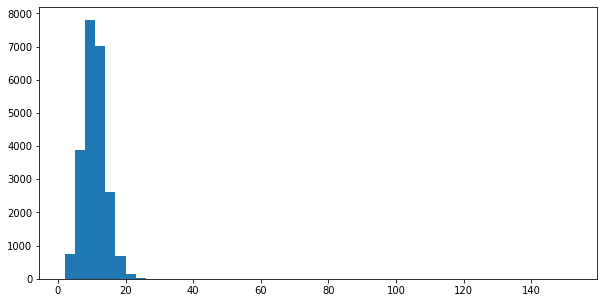

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist([len(seq) for seq in X_train], 50);

In [ ]:
np.sum(np.array([len(seq) for seq in X_train]) < 30)/len(X_train)

0.9997816117056125

In [ ]:
maxlen = 30
X_train_padded = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

In [ ]:
X_train_padded.shape

(22895, 30)

## No pre-trained embedding and no RNN

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout

In [ ]:
embed_dim = 100
model = Sequential([
                    Embedding(input_dim=vocab_size + 1, output_dim=embed_dim, input_length=maxlen),
                    GlobalAveragePooling1D(),
                    Dropout(0.5),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 100)           2775000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 2,781,529
Trainable params: 2,781,529
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train_padded, y=y_train, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
358/358 [==============================] - 10s 27ms/step - loss: 0.5593 - accuracy: 0.7024 - val_loss: 0.3733 - val_accuracy: 0.8372
Epoch 2/10
358/358 [==============================] - 10s 27ms/step - loss: 0.3070 - accuracy: 0.8735 - val_loss: 0.3344 - val_accuracy: 0.8468
Epoch 3/10
358/358 [==============================] - 10s 27ms/step - loss: 0.2066 - accuracy: 0.9216 - val_loss: 0.3424 - val_accuracy: 0.8566
Epoch 4/10
358/358 [==============================] - 10s 27ms/step - loss: 0.1465 - accuracy: 0.9475 - val_loss: 0.3777 - val_accuracy: 0.8482
Epoch 5/10
358/358 [==============================] - 10s 27ms/step - loss: 0.1025 - accuracy: 0.9668 - val_loss: 0.4250 - val_accuracy: 0.8438
Epoch 6/10
358/358 [==============================] - 10s 27ms/step - loss: 0.0755 - accuracy: 0.9756 - val_loss: 0.4789 - val_accuracy: 0.8454
Epoch 7/10
358/358 [==============================] - 10s 27ms/step - loss: 0.0552 - accuracy: 0.9823 - val_loss: 0.5475 - val_accuracy:

## Pre-trained Embeddings with no RNN

In [ ]:
import os
try:
  os.mkdir('./tmp')
except OSError:
  pass

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O ./tmp/glove.6B.100d.txt
embeddings_index = {};
with open('./tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

--2020-11-15 22:00:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘./tmp/glove.6B.100d.txt’

./tmp/glove.6B.100d 100%[===================>] 331.04M   127MB/s    in 2.6s    

2020-11-15 22:00:45 (127 MB/s) - ‘./tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [ ]:
embeddings_matrix = np.zeros((vocab_size + 1, embed_dim))
for word, index in tokenizer.word_index.items():
  embed_vector = embeddings_index.get(word)
  if embed_vector is not None:
    embeddings_matrix[index] = embed_vector

In [ ]:
model = Sequential([
                    Embedding(input_dim=vocab_size + 1, output_dim=embed_dim, input_length=maxlen, weights=[embeddings_matrix], trainable=True),
                    GlobalAveragePooling1D(),
                    Dropout(0.5),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train_padded, y=y_train, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/100
358/358 [==============================] - 10s 27ms/step - loss: 0.6378 - accuracy: 0.6249 - val_loss: 0.4868 - val_accuracy: 0.7816
Epoch 2/100
358/358 [==============================] - 10s 27ms/step - loss: 0.4457 - accuracy: 0.7956 - val_loss: 0.3734 - val_accuracy: 0.8344
Epoch 3/100
358/358 [==============================] - 9s 26ms/step - loss: 0.3592 - accuracy: 0.8449 - val_loss: 0.3432 - val_accuracy: 0.8480
Epoch 4/100
358/358 [==============================] - 9s 26ms/step - loss: 0.3113 - accuracy: 0.8687 - val_loss: 0.3312 - val_accuracy: 0.8536
Epoch 5/100
358/358 [==============================] - 9s 26ms/step - loss: 0.2728 - accuracy: 0.8874 - val_loss: 0.3242 - val_accuracy: 0.8550
Epoch 6/100
358/358 [==============================] - 9s 26ms/step - loss: 0.2433 - accuracy: 0.9031 - val_loss: 0.3241 - val_accuracy: 0.8583
Epoch 7/100
358/358 [==============================] - 9s 26ms/step - loss: 0.2135 - accuracy: 0.9147 - val_loss: 0.3272 - val_accurac

KeyboardInterrupt: ignored

## Pre-trained embeddings with RNN

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

In [ ]:
model = Sequential([
                    Embedding(input_dim=vocab_size + 1, output_dim=embed_dim, input_length=maxlen, weights=[embeddings_matrix], trainable=True, mask_zero=True),
                    Bidirectional(LSTM(128, return_sequences=True)),
                    Bidirectional(LSTM(64, return_sequences=False)),
                    Dropout(0.5),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 100)           2775000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 30, 256)           234496    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train_padded, y=y_train, batch_size=64, epochs=2, validation_data=(X_test_padded, y_test))

Epoch 1/2
358/358 [==============================] - 21s 59ms/step - loss: 0.4406 - accuracy: 0.7887 - val_loss: 0.3296 - val_accuracy: 0.8534
Epoch 2/2
358/358 [==============================] - 18s 50ms/step - loss: 0.2446 - accuracy: 0.9040 - val_loss: 0.3042 - val_accuracy: 0.8747


## Transfer learning (Transformers)

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 12.6MB/s 
     |████████████████████████████████| 890kB 51.5MB/s 
     |████████████████████████████████| 2.9MB 53.1MB/s 
     |████████████████████████████████| 1.1MB 47.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=5084628391dc90d60ccc632471c64f6b40490cc9855ee44299effc6747ac6756
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


### Tokenization

In [ ]:
from transformers import TFBertModel, BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tok_train = tokenizer(texts_train.values.tolist(), padding='max_length', max_length=maxlen, truncation=True)
tok_test = tokenizer(texts_test.values.tolist(), padding='max_length', max_length=maxlen, truncation=True)

In [ ]:
tok_train.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(tok_train['input_ids'][4])
print(tok_train['token_type_ids'][4])
print(tok_train['attention_mask'][4])

[101, 3293, 18461, 2005, 4031, 11073, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
sample_text = texts_train[0]
print(sample_text)
print(tokenizer.tokenize(sample_text))

thirtysomething scientists unveil doomsday clock of hair loss
['thirty', '##some', '##thing', 'scientists', 'un', '##ve', '##il', 'doom', '##sd', '##ay', 'clock', 'of', 'hair', 'loss']


In [ ]:
train_input = [np.array(tok_train['input_ids']), np.array(tok_train['attention_mask']), np.array(tok_train['token_type_ids'])]
val_input = [np.array(tok_test['input_ids']), np.array(tok_test['attention_mask']), np.array(tok_test['token_type_ids'])]

### Model

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased', trainable=False)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
from tensorflow.keras.layers import Concatenate, Lambda, Reshape

In [ ]:
X_ids = Input((maxlen, ), dtype=tf.int32, name='input_ids')
X_types = Input((maxlen, ), dtype=tf.int32, name='token_type_ids')
X_masks = Input((maxlen, ), dtype=tf.int32, name='attention_mask')
bert_out, cls = bert_model([X_ids, X_masks, X_types])
bert_out_first_3 = Lambda(lambda x: x[:,:3,:])(bert_out)
concat = Reshape((3*768,))(bert_out_first_3)
d1 = Dense(512, activation='relu')(concat)
d1o = Dropout(0.5)(d1)
d2 = Dense(64, activation='relu')(d1o)
d2o = Dropout(0.5)(d2)
out = Dense(1, activation='sigmoid')(d2o)

model = Model(inputs=[X_ids, X_masks, X_types], outputs=out)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 30)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 30, 768), (N 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]  

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_input, y=y_train, batch_size=64, epochs=20, validation_data=(val_input, y_test))

Epoch 1/20
358/358 [==============================] - 65s 182ms/step - loss: 0.3545 - accuracy: 0.8413 - val_loss: 0.3350 - val_accuracy: 0.8496
Epoch 2/20
358/358 [==============================] - 64s 179ms/step - loss: 0.3342 - accuracy: 0.8529 - val_loss: 0.3156 - val_accuracy: 0.8587
Epoch 3/20
358/358 [==============================] - 64s 178ms/step - loss: 0.3166 - accuracy: 0.8606 - val_loss: 0.2848 - val_accuracy: 0.8758
Epoch 4/20
358/358 [==============================] - 64s 178ms/step - loss: 0.3083 - accuracy: 0.8677 - val_loss: 0.2781 - val_accuracy: 0.8781
Epoch 5/20
358/358 [==============================] - 64s 178ms/step - loss: 0.2981 - accuracy: 0.8708 - val_loss: 0.2753 - val_accuracy: 0.8809
Epoch 6/20
358/358 [==============================] - 64s 178ms/step - loss: 0.2876 - accuracy: 0.8775 - val_loss: 0.2638 - val_accuracy: 0.8833
Epoch 7/20
358/358 [==============================] - 64s 178ms/step - loss: 0.2794 - accuracy: 0.8783 - val_loss: 0.2659 - val_ac

KeyboardInterrupt: ignored